# Project Final Report

## Introduction

### Relevant Background Information
A research group in Computer Science at UBC is collecting data about how people play video games. They set up a Minecraft Server and recorded players actions.

### Question that we are trying to answer
The question that our group is answering is which "kinds" of players are most likely to contribute a large amount of data so that the research group can target those players in their recruiting efforts.
- This data set contains data about PlaiCraft, containing data about the information the player used to sign up and each individual session of PLAICraft that occurred.

### Describing the dataset
#### Players CSV
This file contains data about the players/users sign-up information from PLAICraft
- 197 observations
- 9 variables 

#### Variables
| Experience (character) | Subscribe (logical) | hashedEmail (character) | played_hours (double) | name (character) | gender (character) | age (double) | individualid (logical) | organizationName (logical) |
| ---------- | --------- | ----------- | ------------ | ---- | ------ | --- | ------------ | ---------------- |
| How familiar the player is with minecraft | Whether player has subscribed to PLAICraft's email updates| Encrypted email address of the player | How many hours the player has spent playing PLAICraft | Name of the player | Gender of the player | Age of the player | ID of the player | Organization that the player belongs to|

#### Sessions CSV

This file contains data about each individual session in Plaicraft. 
- 1536 observations
- 5 variables

#### Variables
| hashedEmail (character) | start_time (character) | end_time (character) | original_start_time (double) | original_end_time (double) |
| ----------- | ---------- | -------- | ------------------- | ----------------- |
| Encrypted email adress of the player | Time and date when player started a session | Time and date when player ended a session | Start time in Unix Timestamp Format | End Time in Unix Timestamp Format |

## Methods & Results

In [35]:
## import necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

In [36]:
## load the data

player_url <- 'https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz'
session_url <- 'https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB'

player_data <- read_csv(player_url)
session_data <- read_csv(session_url)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [37]:
player_data 
session_data

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


There are some issues in `player_data` that we can fix with some wrangling:
 * the `experience` and `gender` columns should be factors, because they are categorical variables
 * the `individualId` and `organizationName` columns seem to not have any content in them, so we should investigate and remove them if necessary

In [38]:
## refactor columns + remove unnecessary columns
players <- player_data |>
    mutate(experience = as_factor(experience), gender = as_factor(gender)) |>
    select(-individualId, -organizationName)

players

experience,subscribe,hashedEmail,played_hours,name,gender,age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91


In [39]:
## now that the dataset is tidy, remove the unecessary columns for data analysis

players <- players |>
    select(experience, played_hours, age)
players

experience,played_hours,age
<fct>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
⋮,⋮,⋮
Amateur,0.0,17
Amateur,2.3,17
Pro,0.2,91


## Summary of the Players CSV

|          |played_hours | age |
|:---------|:-------------|:----|
|**Type**  | factor |  double  |  integer |
|**Meaning** | Experience of player based on how long they've played Minecraft for | Number of hours played on the PLAICraft server in total |  The age of the player |
|**Options** | Number to the nearest tenth |  Any age between 7 and 99 |
|**Method** | Automatically tracked once the user goes into the PLAICraft server |  The player picks based on these options |

This dataset contains information to perform the necessary data analysis to answer our questions

- 196 observations
- 3 variables


experience,avg_played_hours
<fct>,<dbl>
Pro,2.6000000
Veteran,0.6479167
Amateur,6.0174603
Regular,18.2083333
Beginner,1.2485714


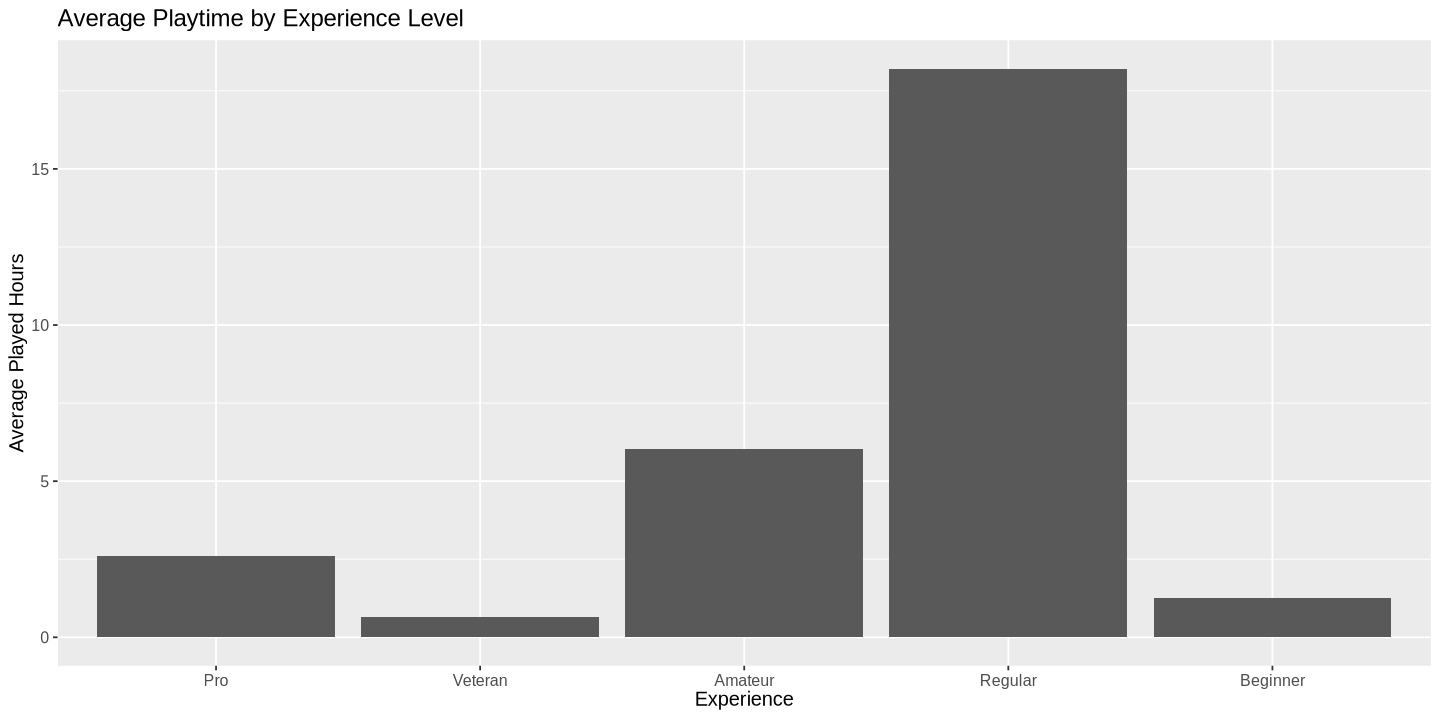

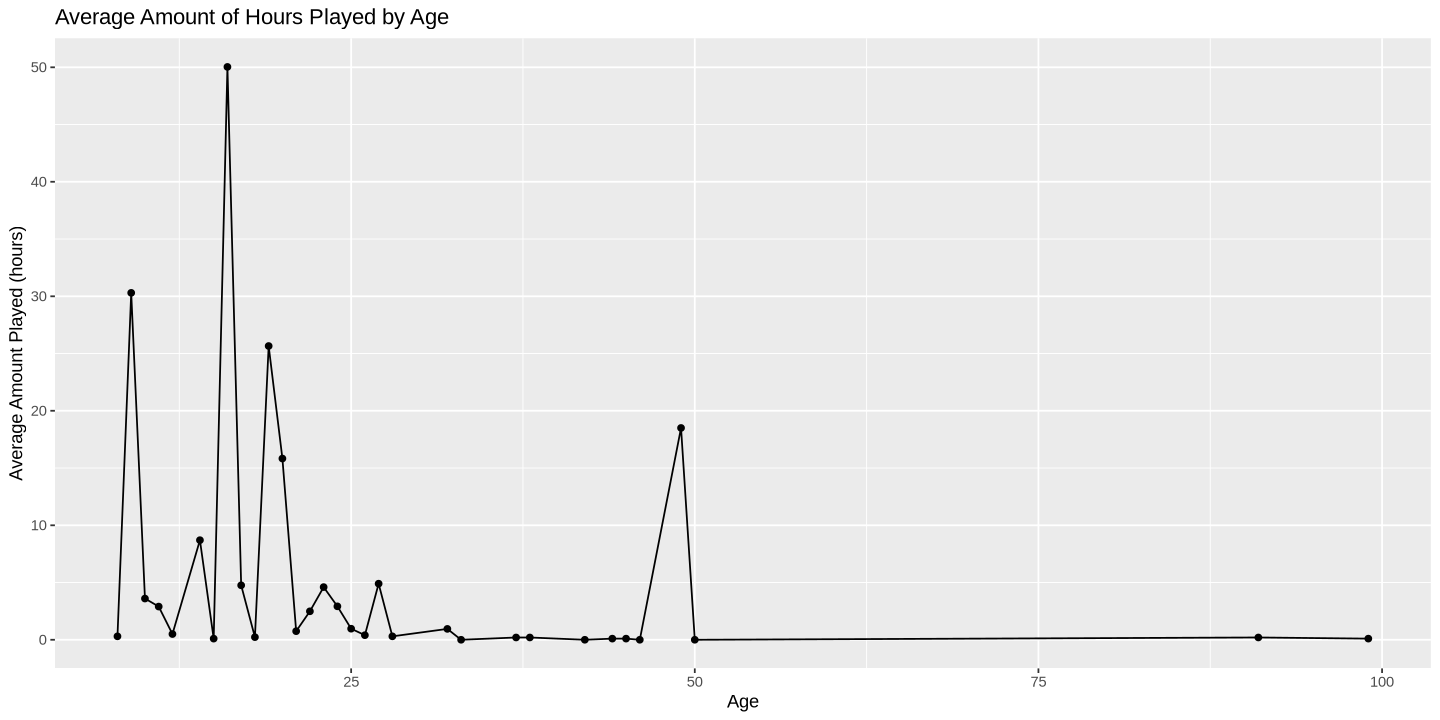

In [40]:
## Visualization of the dataset for exploratory data analysis

options(repr.plot.width = 12, repr.plot.height = 6)

exp_playtime <- players |>
    group_by(experience) |>
    summarize(avg_played_hours = mean(played_hours))

exp_playtime

exp_vs_playtime <- ggplot(exp_playtime, aes(x = experience, y = avg_played_hours)) +
    geom_bar(stat = "identity") +
    labs(x = "Experience", y = "Average Played Hours") +
    theme(text = element_text(size = 12)) +
    ggtitle("Average Playtime by Experience Level")

exp_vs_playtime

age_hours_plot <- players |>
                group_by(age) |>
                summarize(avg_hours = mean(played_hours)) |>
                ggplot(aes(x = age, y = avg_hours)) +
                geom_point() +
                geom_line() +
                labs(x = "Age", y = "Average Amount Played (hours)") +
                ggtitle("Average Amount of Hours Played by Age")
age_hours_plot


In [58]:
# Performing regression using age to predict the amount of hours a player will play
set.seed(1)

options(repr.plot.width = 12, repr.plot.height = 6)

# Tuning the regression model by finding the optimal k value
players_split <- initial_split(players, prop = 0.7, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

players_recipe <- recipe(played_hours ~ age, data = players_training) |>
    step_scale(age) |>
    step_center(age)

players_vfold <- vfold_cv(players_training, v = 10, strata = played_hours)

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

player_results <- players_workflow |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics()

player_min <- player_results |>
    filter(.metric == "rmse") |>
    slice_min(n = 1, mean)

player_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
23,rmse,standard,21.75977,10,7.592461,Preprocessor1_Model23


In [59]:
# Assessing how well our regression model will do on the testing data
set.seed(1)

k_min <- player_min |>
    pull(neighbors) 

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
    set_engine("kknn") |>
    set_mode("regression")

players_best_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_best_spec) |>
    fit(data = players_training)

players_summary <- players_best_fit |>
    predict(players_testing) |>
    bind_cols(players_testing) |>
    metrics(truth = played_hours, estimate = .pred)

players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,21.61877783
rsq,standard,0.01123679
mae,standard,7.07847826


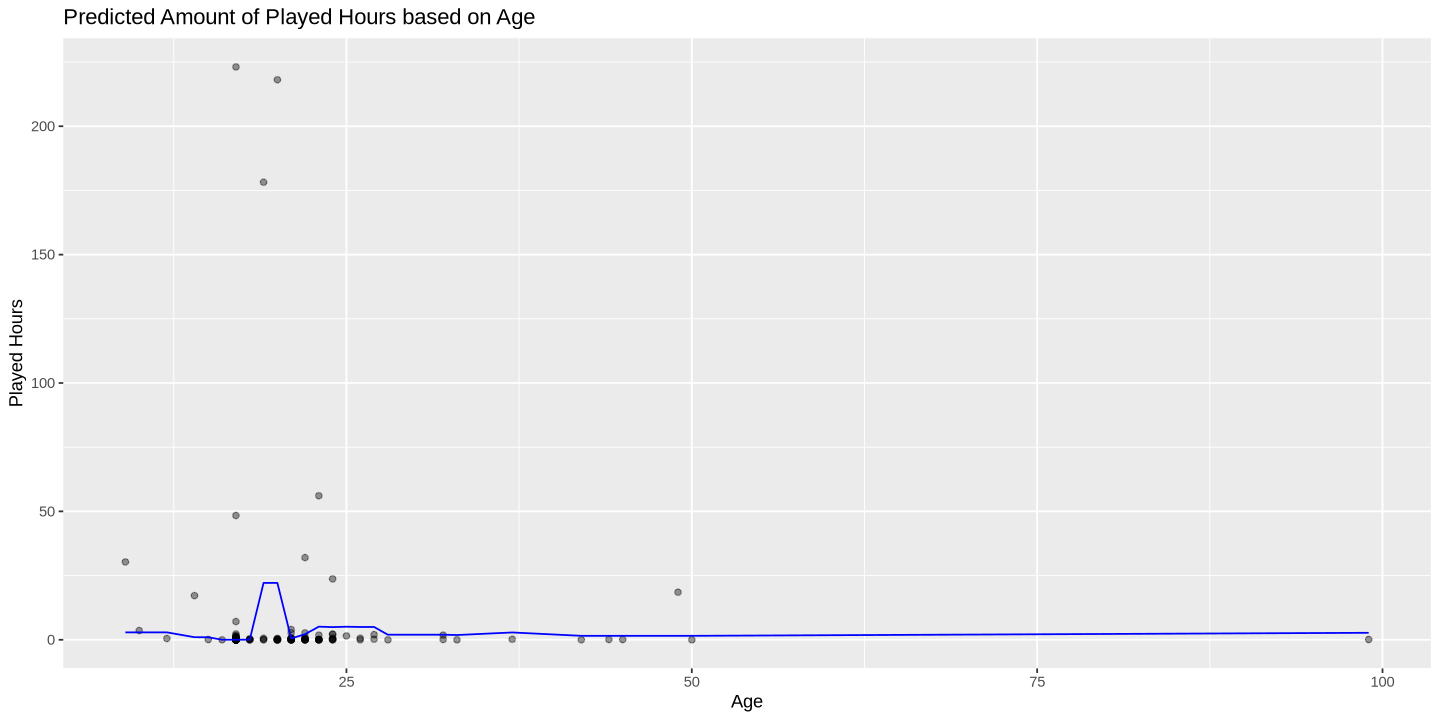

In [57]:
# Visualization of the predictions between age and played hours

player_preds <- players_best_fit |>
    predict(players_training) |>
    bind_cols(players_training) 

players_plot <- player_preds |>
    ggplot(aes (x = age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    geom_line(data = player_preds, color = "blue", aes(x = age, y = .pred)) +
    labs(x = "Age", y = "Played Hours") +
    ggtitle("Predicted Amount of Played Hours based on Age")

players_plot


## Discussion

### Summary of Findings
There were no obvious trends between the relationship of age and amount of hours played on PlaiCraft after the age 25. However there is a large amount of played_hours before age 25 where it seems players will play more than players of age 25 or higher.

### Was the results expected?
Yes these results were expected. More often than not teenagers/young adults play video games more than older users. Therefore our regression model follows this trend as players under 25 generally play more than players older than 25. To add to this most of the players playing PlaiCraft are university students from UBC who are usually under the age 25, this means that there would be more data to gather from younger students rather than older students where we don't have as much data. 

### What impact could these findings have?
The research group in Computer Science at UBC should aim to recruit players of age 25 or less to play PlaiCraft in order to maxmize the amount of data they will contribute to the project.

### What future questions could this lead to?
We found that we didn't have as much data on players above the age of 25, therefore a question we can ask is if the prediction line will change if there is more data on older players.
Another question we could ask is how we could get players above 25 to contribute more to the PlaiCraft research project.